# Transgrancanaria 2023 Classic 
*25 February 2023*

In [13]:
import sys
import pandas as pd
sys.path.append('../src/')
from results.results import Results
from scraper.scraper import Scraper

In [14]:
# Data downloaded already (check scraper notebook)
results_raw = pd.read_csv('../data/transgrancanaria/transgrancanaria_classic_2023.csv', sep=',')

# Let's get the Control Points information
events = ['transgrancanaria']
years = ['2023']
scr = Scraper(events=events, years=years)
control_points = scr.getControlPoints()['classic']

results_raw.columns = list(results_raw.columns[:5]) + [k for k in control_points.keys()]

/VSCode/personnel/MLTrail/examples/../src/scraper/scraper.py:138: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 138 of the file /VSCode/personnel/MLTrail/examples/../src/scraper/scraper.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(data, 'html')
/VSCode/personnel/MLTrail/examples/../src/scraper/scraper.py:138: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make s

In [15]:
results_raw.head()

,n,doss,nom,prenom,cat,Salida Clasic,Tenoya,Arucas,Teror,Fontanales,El Hornillo,Artenara,Tejeda,Roque Nublo,Garañon,Tunte,Ayagaures,Meta Parque Sur
0,1,5,SIMON AYMERICH,Andreu,MA30H,00:00:13,00:49:27,01:33:37,02:48:50,04:09:20,05:20:20,06:59:50,08:24:31,09:45:43,10:09:25,11:22:00,12:29:37,13:39:46
1,2,14,ARSÉNIO,Miguel,EL H,00:00:13,00:51:13,01:36:42,02:52:18,04:14:16,05:28:13,07:12:03,08:34:43,09:50:27,10:12:13,11:26:32,12:34:22,13:44:50
2,3,17,GREEN,Tyler,MA30H,00:00:13,00:50:46,01:35:19,02:52:42,04:14:19,05:28:31,07:09:21,08:36:47,NaN,10:20:43,11:38:20,12:52:21,14:06:59
3,4,18,BUTACI,Raul,MA30H,00:00:13,00:49:34,01:33:48,02:49:13,04:10:40,05:19:47,06:58:30,08:27:01,09:51:18,10:16:20,11:35:38,12:54:03,14:15:53
4,5,1,CAPELL GIL,Pau,MA30H,00:00:13,00:49:32,01:34:13,02:51:44,04:14:25,05:28:59,07:09:50,08:38:52,10:01:31,10:26:54,11:52:23,13:09:01,14:22:28


In [16]:
control_points

{'Salida Clasic': (0.0, 0, 1),
 'Tenoya': (11.43, 348, -187),
 'Arucas': (19.44, 704, -481),
 'Teror': (31.95, 1509, -921),
 'Fontanales': (43.55, 2463, -1460),
 'El Hornillo': (53.51, 3089, -2338),
 'Artenara': (67.11, 4156, -2960),
 'Tejeda': (79.63, 4919, -3877),
 'Roque Nublo': (88.15, 5869, -4127),
 'Garañon': (91.32, 6042, -4371),
 'Tunte': (104.26, 6369, -5482),
 'Ayagaures': (116.57, 6803, -6499),
 'Meta Parque Sur': (130.74, 7000, -6969)}

In [17]:
control_points.pop(next(iter(control_points))) # Remove 1st CP (starting line)
times = results_raw[control_points.keys()]
rs = Results(controlPoints=control_points, times=times, offset=0, cleanDays=False)


In [18]:
rs.times

,Tenoya,Arucas,Teror,Fontanales,El Hornillo,Artenara,Tejeda,Roque Nublo,Garañon,Tunte,Ayagaures,Meta Parque Sur
0,00:49:27,01:33:37,02:48:50,04:09:20,05:20:20,06:59:50,08:24:31,09:45:43,10:09:25,11:22:00,12:29:37,13:39:46
1,00:51:13,01:36:42,02:52:18,04:14:16,05:28:13,07:12:03,08:34:43,09:50:27,10:12:13,11:26:32,12:34:22,13:44:50
2,00:50:46,01:35:19,02:52:42,04:14:19,05:28:31,07:09:21,08:36:47,09:50:27,10:20:43,11:38:20,12:52:21,14:06:59
3,00:49:34,01:33:48,02:49:13,04:10:40,05:19:47,06:58:30,08:27:01,09:51:18,10:16:20,11:35:38,12:54:03,14:15:53
4,00:49:32,01:34:13,02:51:44,04:14:25,05:28:59,07:09:50,08:38:52,10:01:31,10:26:54,11:52:23,13:09:01,14:22:28
...,...,...,...,...,...,...,...,...,...,...,...,...
333,01:26:04,02:50:17,05:41:11,08:19:01,11:12:06,14:39:05,17:47:56,19:36:15,20:10:23,23:05:33,"1 day, 1:57:34","1 day, 5:47:14"
334,01:24:59,02:48:45,05:27:58,07:55:14,10:19:50,13:26:09,16:37:33,19:04:33,19:51:23,23:19:40,"1 day, 2:16:54","1 day, 5:48:19"
335,01:17:34,02:28:35,04:48:21,07:11:10,09:35:29,12:53:51,16:02:34,18:41:08,19:36:36,22:48:22,"1 day, 1:59:10","1 day, 5:48:49"
336,01:20:43,02:41:12,05:12:05,07:43:17,10:14:53,13:31:40,17:04:12,19:31:15,20:16:01,23:09:21,"1 day, 2:09:48","1 day, 5:52:12"


In [19]:
rs.paces

,Tenoya,Arucas,Teror,Fontanales,El Hornillo,Artenara,Tejeda,Roque Nublo,Garañon,Tunte,Ayagaures,Meta Parque Sur
0,0:04:19,0:05:30,0:06:00,0:06:56,0:07:07,0:07:18,0:06:45,0:09:31,0:07:28,0:05:36,0:05:29,0:04:57
1,0:04:28,0:05:40,0:06:02,0:07:03,0:07:25,0:07:38,0:06:36,0:08:53,0:06:51,0:05:44,0:05:30,0:04:58
2,0:04:26,0:05:33,0:06:11,0:07:02,0:07:26,0:07:24,0:06:59,0:08:38,0:09:32,0:05:59,0:06:00,0:05:16
3,0:04:20,0:05:31,0:06:01,0:07:01,0:06:56,0:07:15,0:07:04,0:09:53,0:07:53,0:06:07,0:06:22,0:05:46
4,0:04:20,0:05:34,0:06:11,0:07:07,0:07:29,0:07:24,0:07:06,0:09:42,0:08:00,0:06:36,0:06:13,0:05:11
...,...,...,...,...,...,...,...,...,...,...,...,...
333,0:07:31,0:10:30,0:13:39,0:13:36,0:17:22,0:15:13,0:15:05,0:12:42,0:10:46,0:13:32,0:13:58,0:16:12
334,0:07:26,0:10:27,0:12:43,0:12:41,0:14:31,0:13:41,0:15:17,0:17:15,0:14:46,0:16:05,0:14:23,0:14:55
335,0:06:47,0:08:51,0:11:10,0:12:18,0:14:29,0:14:35,0:15:04,0:18:36,0:17:29,0:14:49,0:15:29,0:16:12
336,0:07:03,0:10:02,0:12:03,0:13:02,0:15:13,0:14:28,0:16:58,0:17:15,0:14:07,0:13:23,0:14:39,0:15:41


In [20]:
# Normalized paces are paces adjusted to positive elevation gain
# Each 100m climb adds a km for pace computation
rs.pacesNorm

,Tenoya,Arucas,Teror,Fontanales,El Hornillo,Artenara,Tejeda,Roque Nublo,Garañon,Tunte,Ayagaures,Meta Parque Sur
0,0:03:18,0:05:07,0:04:39,0:05:06,0:09:32,0:05:30,0:07:42,0:05:13,0:09:38,0:14:13,0:10:26,0:06:07
1,0:03:26,0:05:16,0:04:40,0:05:12,0:09:56,0:05:45,0:07:31,0:04:52,0:08:50,0:14:34,0:10:28,0:06:09
2,0:03:24,0:05:09,0:04:47,0:05:10,0:09:58,0:05:35,0:07:57,0:04:44,0:12:18,0:15:13,0:11:25,0:06:31
3,0:03:19,0:05:07,0:04:40,0:05:10,0:09:17,0:05:28,0:08:03,0:05:25,0:10:10,0:15:32,0:12:06,0:07:09
4,0:03:19,0:05:10,0:04:47,0:05:14,0:10:01,0:05:35,0:08:06,0:05:19,0:10:19,0:16:45,0:11:49,0:06:25
...,...,...,...,...,...,...,...,...,...,...,...,...
333,0:05:46,0:09:45,0:10:34,0:10:01,0:23:15,0:11:28,0:17:11,0:06:58,0:13:52,0:34:20,0:26:32,0:20:04
334,0:05:41,0:09:42,0:09:51,0:09:21,0:19:26,0:10:19,0:17:25,0:09:28,0:19:02,0:40:50,0:27:21,0:18:28
335,0:05:12,0:08:13,0:08:38,0:09:04,0:19:23,0:10:59,0:17:11,0:10:13,0:22:32,0:37:36,0:29:26,0:20:04
336,0:05:24,0:09:19,0:09:20,0:09:36,0:20:22,0:10:54,0:19:21,0:09:28,0:18:11,0:33:59,0:27:50,0:19:26


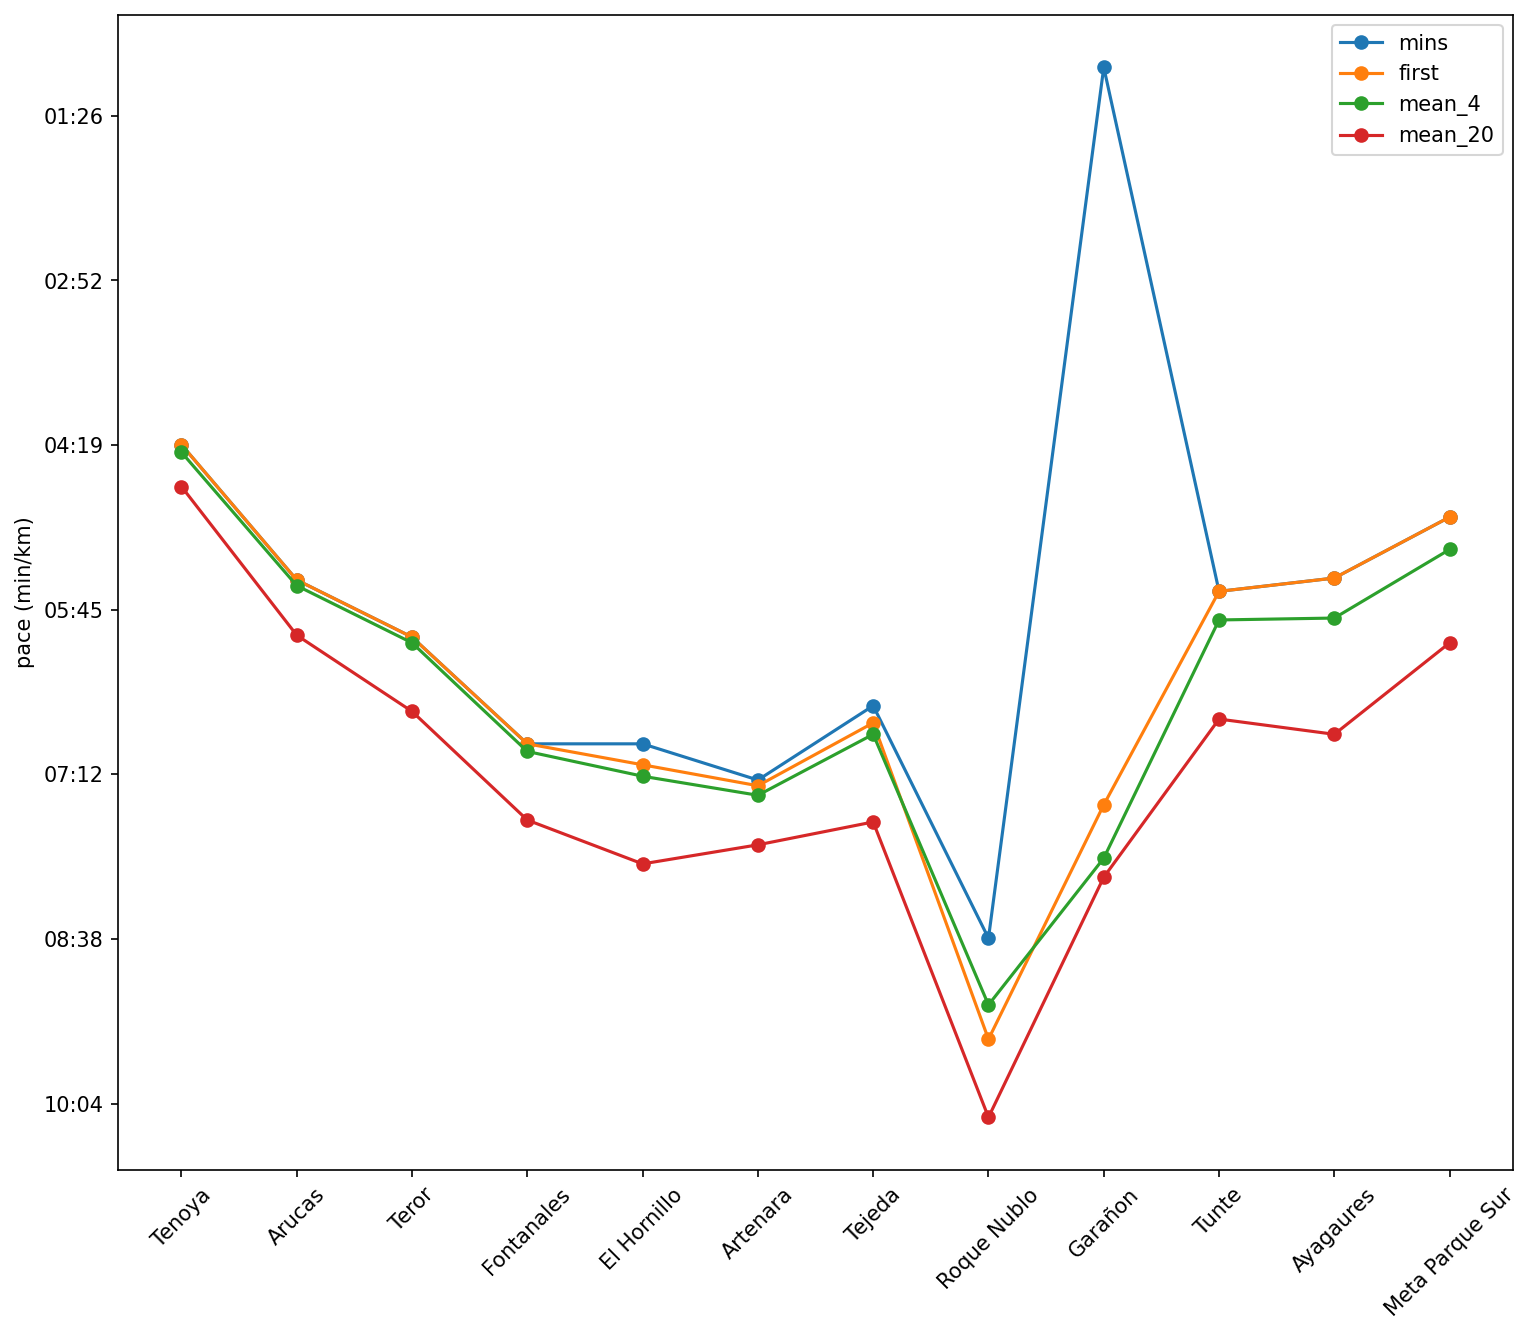

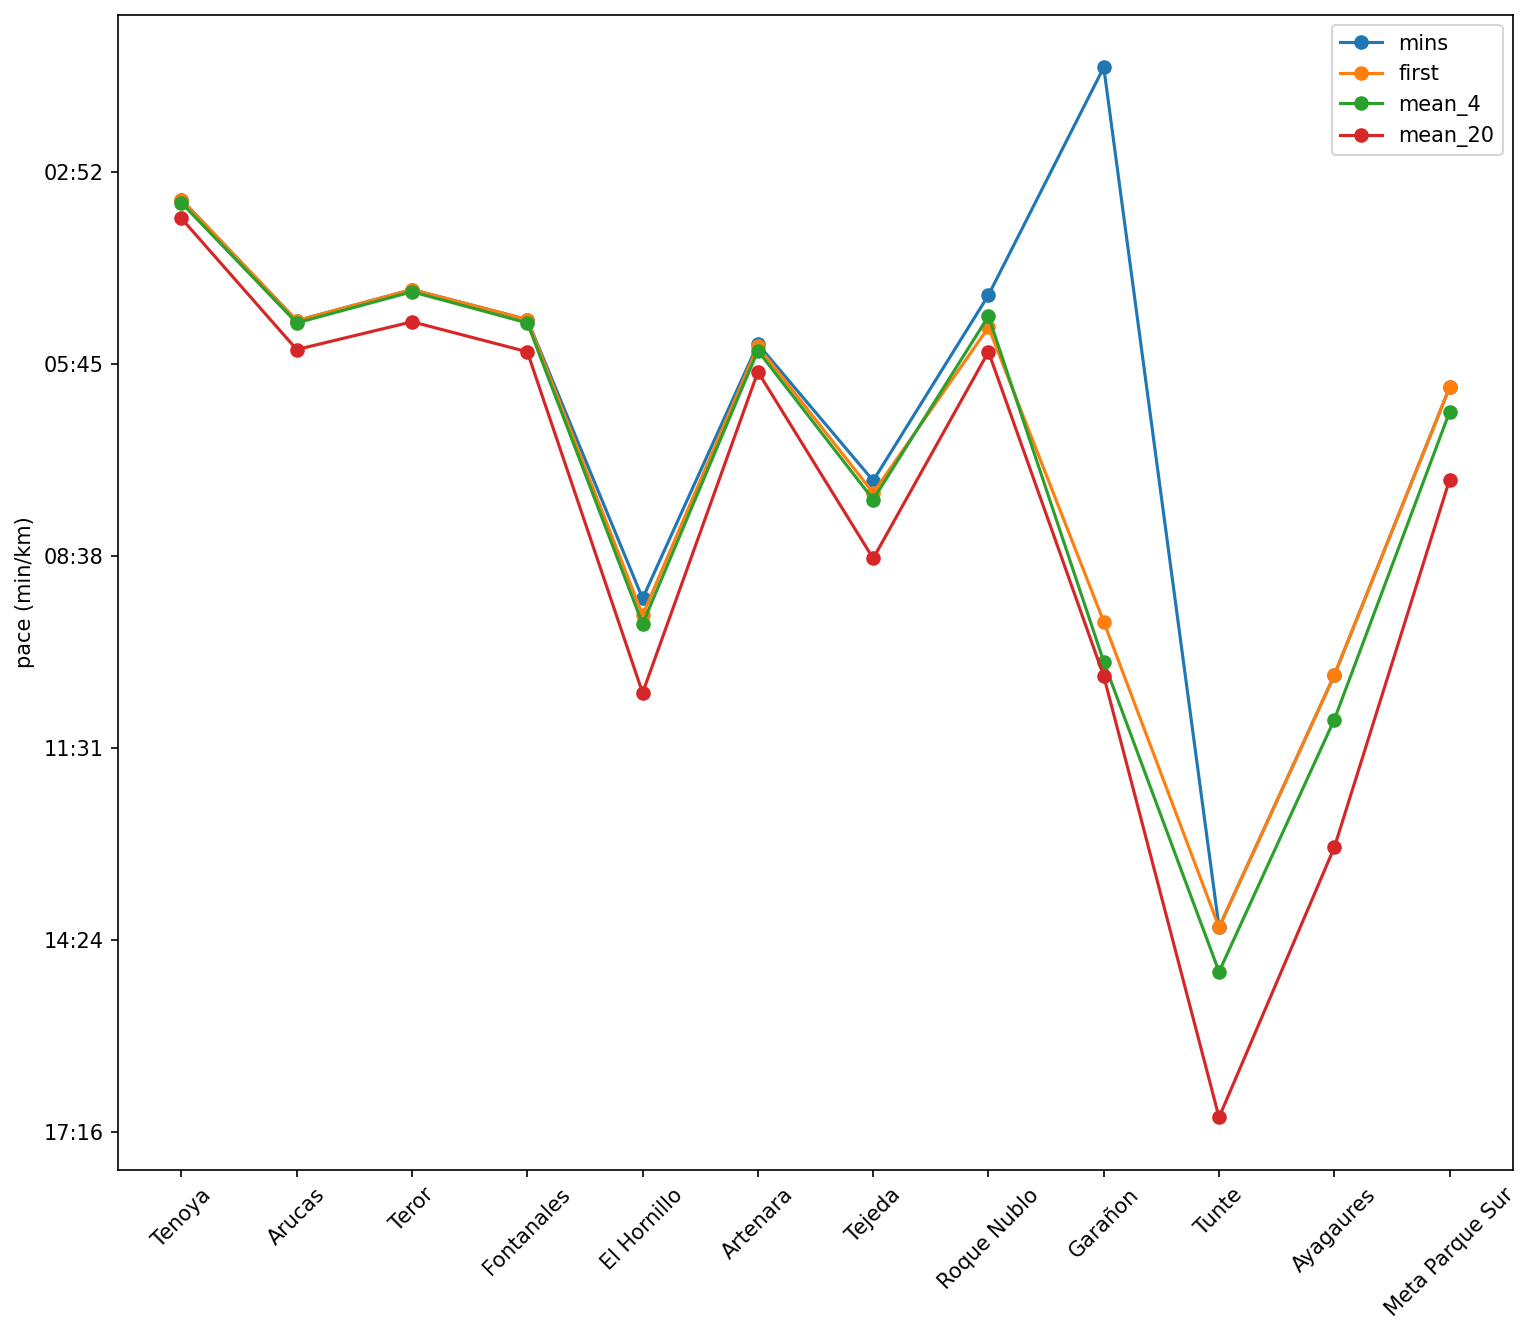

In [21]:
rs.plotControlPoints(rs.getStats(),xrotate=True,inverty=True)
rs.plotControlPoints(rs.getStatsNorm(),xrotate=True,inverty=True)

## Objective analysis

Choose the participant closest to your target time, entering his final position. Graph shows the mean paces or times for the 5 people closest to that time.

In [22]:
objectivePosition = rs.getClosestTimeToObjective('23:00:03')
rs.setObjective(objectivePosition)
obj = rs.getObjectivePaces()
mean_obj = rs.getObjectiveMeanPaces()

In [23]:
rs.paces.loc[objectivePosition-2:objectivePosition+2]

,Tenoya,Arucas,Teror,Fontanales,El Hornillo,Artenara,Tejeda,Roque Nublo,Garañon,Tunte,Ayagaures,Meta Parque Sur
130,0:05:42,0:07:13,0:09:58,0:10:34,0:12:31,0:11:32,0:11:36,0:16:37,0:13:39,0:10:20,0:10:11,0:09:09
131,0:06:39,0:08:24,0:10:06,0:10:51,0:12:41,0:11:32,0:11:12,0:15:56,0:11:42,0:11:00,0:09:31,0:08:43
132,0:05:54,0:08:49,0:10:32,0:11:06,0:12:33,0:10:18,0:12:47,0:16:07,0:14:25,0:09:56,0:10:30,0:08:19
133,0:05:34,0:07:21,0:09:29,0:10:56,0:11:45,0:11:19,0:12:39,0:18:32,0:12:34,0:09:56,0:10:33,0:09:09
134,0:07:11,0:09:41,0:10:16,0:11:07,0:12:11,0:11:30,0:10:55,0:16:08,0:12:39,0:10:25,0:08:37,0:09:27


In [24]:
rs.times

,Tenoya,Arucas,Teror,Fontanales,El Hornillo,Artenara,Tejeda,Roque Nublo,Garañon,Tunte,Ayagaures,Meta Parque Sur
0,00:49:27,01:33:37,02:48:50,04:09:20,05:20:20,06:59:50,08:24:31,09:45:43,10:09:25,11:22:00,12:29:37,13:39:46
1,00:51:13,01:36:42,02:52:18,04:14:16,05:28:13,07:12:03,08:34:43,09:50:27,10:12:13,11:26:32,12:34:22,13:44:50
2,00:50:46,01:35:19,02:52:42,04:14:19,05:28:31,07:09:21,08:36:47,09:50:27,10:20:43,11:38:20,12:52:21,14:06:59
3,00:49:34,01:33:48,02:49:13,04:10:40,05:19:47,06:58:30,08:27:01,09:51:18,10:16:20,11:35:38,12:54:03,14:15:53
4,00:49:32,01:34:13,02:51:44,04:14:25,05:28:59,07:09:50,08:38:52,10:01:31,10:26:54,11:52:23,13:09:01,14:22:28
...,...,...,...,...,...,...,...,...,...,...,...,...
333,01:26:04,02:50:17,05:41:11,08:19:01,11:12:06,14:39:05,17:47:56,19:36:15,20:10:23,23:05:33,"1 day, 1:57:34","1 day, 5:47:14"
334,01:24:59,02:48:45,05:27:58,07:55:14,10:19:50,13:26:09,16:37:33,19:04:33,19:51:23,23:19:40,"1 day, 2:16:54","1 day, 5:48:19"
335,01:17:34,02:28:35,04:48:21,07:11:10,09:35:29,12:53:51,16:02:34,18:41:08,19:36:36,22:48:22,"1 day, 1:59:10","1 day, 5:48:49"
336,01:20:43,02:41:12,05:12:05,07:43:17,10:14:53,13:31:40,17:04:12,19:31:15,20:16:01,23:09:21,"1 day, 2:09:48","1 day, 5:52:12"


In [25]:
mean_obj_times = rs.getObjectiveMeanTimes()
mean_obj_times


,Tenoya,Arucas,Teror,Fontanales,El Hornillo,Artenara,Tejeda,Roque Nublo,Garañon,Tunte,Ayagaures,Meta Parque Sur
0,1:10:58,2:17:27,4:23:32,6:30:14,8:33:10,11:06:04,13:34:19,15:56:23,16:37:37,18:51:15,20:52:54,22:59:55


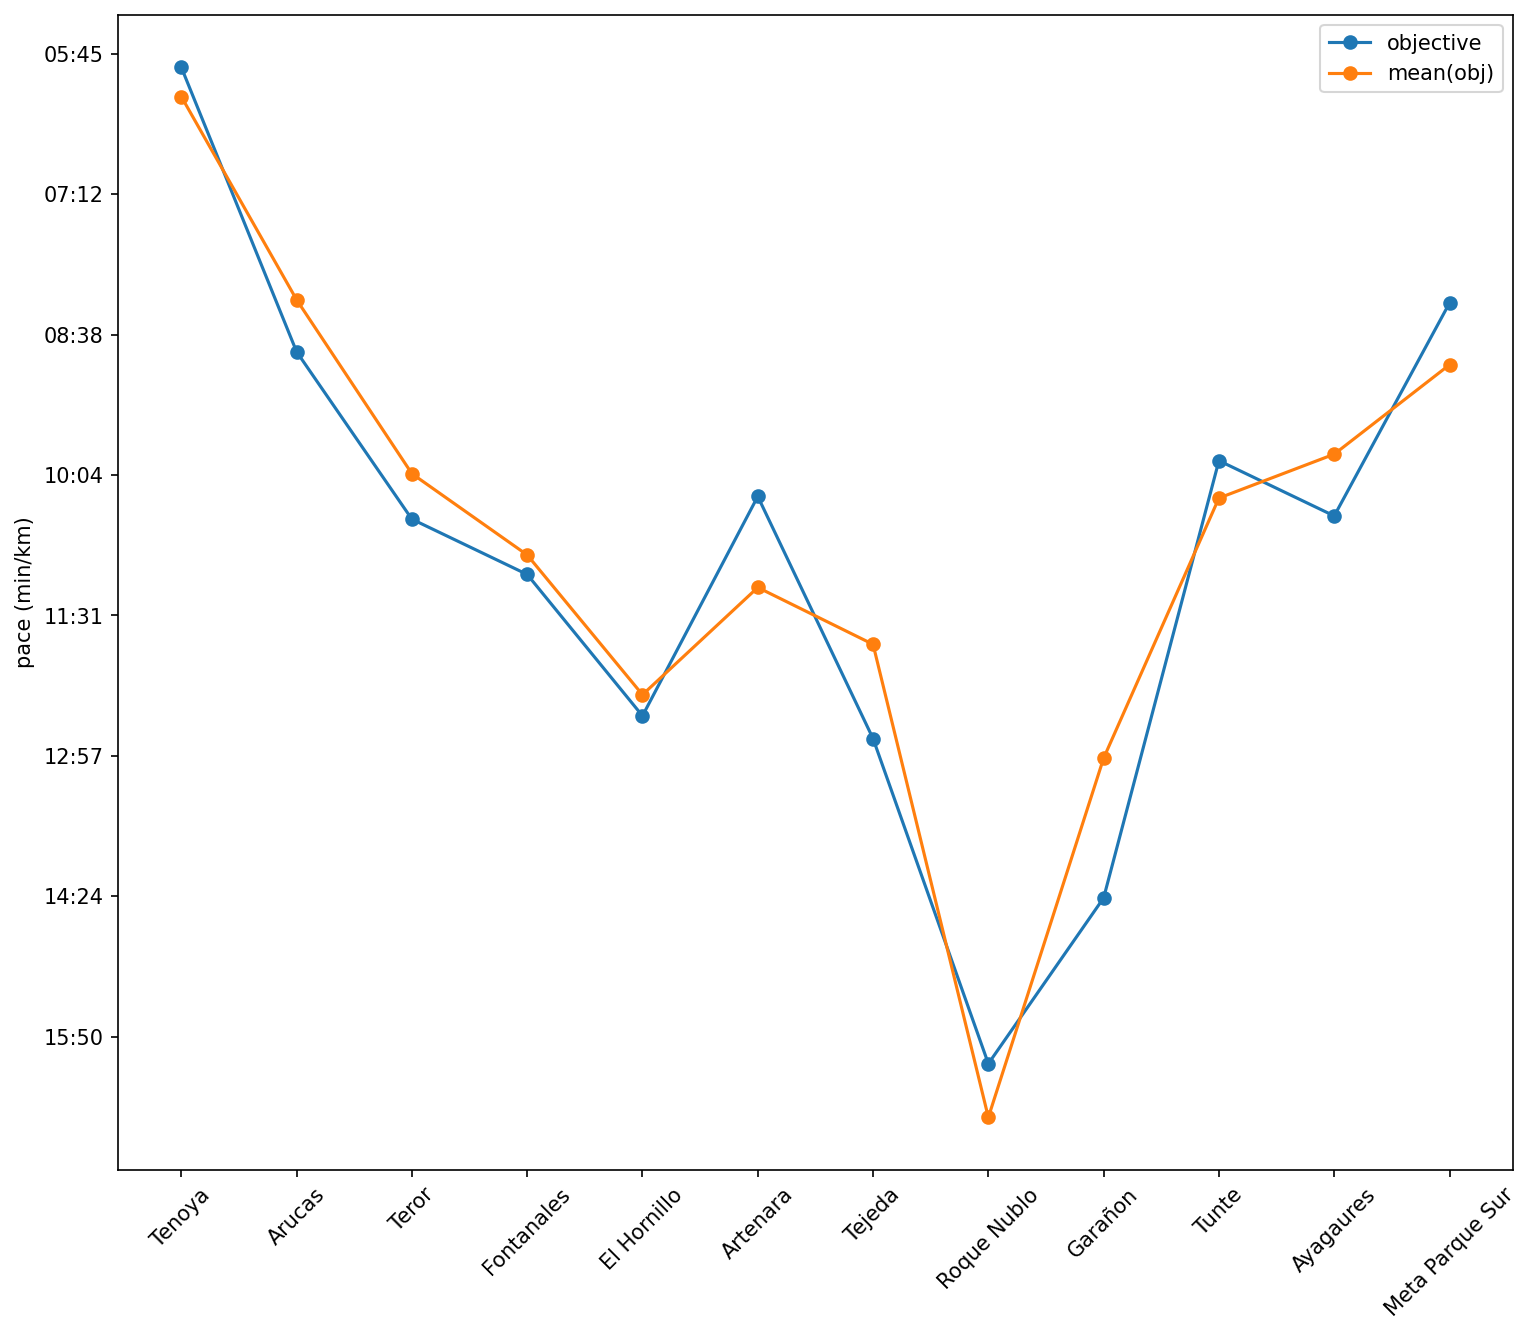

In [26]:
index = ['objective','mean(obj)']
paces = pd.concat([obj,mean_obj],ignore_index=True)
paces['index'] = index
paces.set_index('index',inplace=True)

rs.plotControlPoints(paces,xrotate=True,inverty=True)


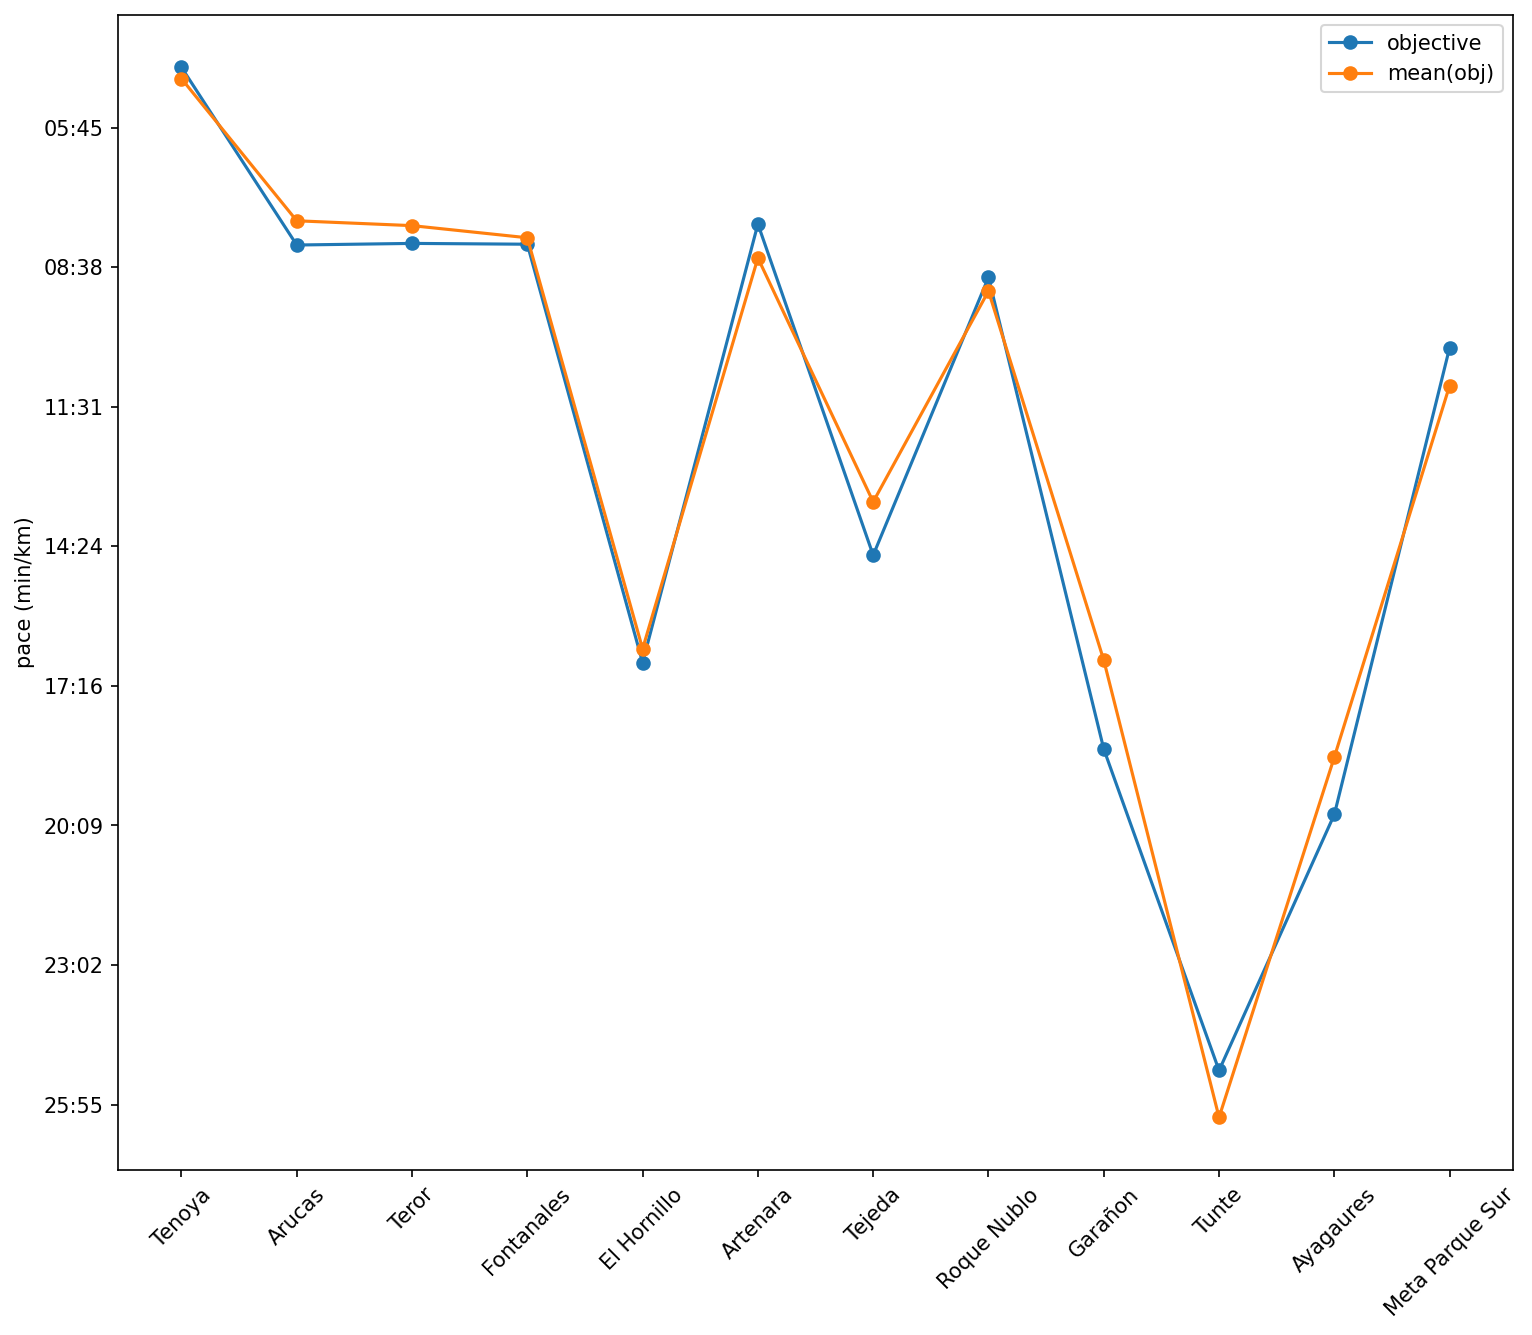

In [27]:
index = ['objective','mean(obj)']
paces = pd.concat([rs.getObjectivePacesNorm(),rs.getObjectiveMeanPacesNorm()],ignore_index=True)
paces['index'] = index
paces.set_index('index',inplace=True)

rs.plotControlPoints(paces,xrotate=True,inverty=True)
